<!-- - Add data visualization charts
- check all the features of customer id which is nan(for individual features)

imputation - missing value treatments - justify the reasons for the your treatment.

hovering-type charts

dataframe - description and quantity And rename columns

Unique item total quantity(Viz)

Invoice num, date & total amount(DF) -->

# - Add data visualization charts
# - check all the features of customer id which is nan(for individual features)

# imputation - missing value treatments - justify the reasons for the your treatment.

# hovering-type charts

# dataframe - description and quantity And rename columns (rename done)

# Unique item total quantity(Viz)

# Invoice num, date & total amount(DF)

In [2]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt 



In [3]:
df = pd.read_csv('C:\\Users\\andre\\Desktop\\my folders\\data\\COATSprojects\\data_main.csv')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
df.shape

(541909, 8)

In [5]:
df.size


4335272

In [6]:
df.ndim

2

In [7]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [8]:
def show_missing(df):
    """
    Return the total missing values and the percentage of
    missing values by column.
    """
    null_count = df.isnull().sum()
    null_percentage = (null_count / df.shape[0]) * 100
    empty_count = pd.Series(((df == ' ') | (df == '')).sum())
    empty_percentage = (empty_count / df.shape[0]) * 100
    nan_count = pd.Series(((df == 'nan') | (df == 'NaN')).sum())
    nan_percentage = (nan_count / df.shape[0]) * 100
    return pd.DataFrame({'num_missing': null_count, 'missing_percentage': null_percentage,
                         'num_empty': empty_count, 'empty_percentage': empty_percentage,
                         'nan_count': nan_count, 'nan_percentage': nan_percentage})

In [9]:
show_missing(df)

,num_missing,missing_percentage,num_empty,empty_percentage,nan_count,nan_percentage
InvoiceNo,0,0.000000,0,0.0,0,0.0
StockCode,0,0.000000,0,0.0,0,0.0
Description,1454,0.268311,0,0.0,0,0.0
Quantity,0,0.000000,0,0.0,0,0.0
InvoiceDate,0,0.000000,0,0.0,0,0.0
UnitPrice,0,0.000000,0,0.0,0,0.0
CustomerID,135080,24.926694,0,0.0,0,0.0
Country,0,0.000000,0,0.0,0,0.0


In [10]:
df.columns = df.columns.str.replace('Description', 'Product_Name')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   InvoiceNo     541909 non-null  object 
 1   StockCode     541909 non-null  object 
 2   Product_Name  540455 non-null  object 
 3   Quantity      541909 non-null  int64  
 4   InvoiceDate   541909 non-null  object 
 5   UnitPrice     541909 non-null  float64
 6   CustomerID    406829 non-null  float64
 7   Country       541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


# checking if the pattern of missing values

In [12]:
df['Product_Name'].value_counts(dropna=False)

df_null = df.loc[(df['Product_Name'].isnull()) & (df['CustomerID'].notna())]
df_null.sum()
#for every product is null the customerId is also null


InvoiceNo       0.0
StockCode       0.0
Product_Name    0.0
Quantity        0.0
InvoiceDate     0.0
UnitPrice       0.0
CustomerID      0.0
Country         0.0
dtype: float64

In [13]:
df['CustomerID'].value_counts(dropna=False)

NaN        135080
17841.0      7983
14911.0      5903
14096.0      5128
12748.0      4642
            ...  
15070.0         1
17331.0         1
15369.0         1
17443.0         1
14090.0         1
Name: CustomerID, Length: 4373, dtype: int64

In [14]:

# df['CustomerId']=df['CustomerID'].str.lstrip()
df_null2 = df.loc[(df['CustomerID']).isna() &(df['Product_Name'].notna()) ]

# df_null2 = df.loc[df['CustomerID']=='  ']
df_null2

,InvoiceNo,StockCode,Product_Name,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom
1447,536544,21790,VINTAGE SNAP CARDS,9,12/1/2010 14:32,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,12/9/2011 10:26,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,12/9/2011 10:26,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,12/9/2011 10:26,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,12/9/2011 10:26,10.79,NaN,United Kingdom


In [16]:
df_sum_not_correlated=df[(df['CustomerID']).isna() &(df['Product_Name'].notna())]
df_sum_not_correlated

,InvoiceNo,StockCode,Product_Name,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom
1447,536544,21790,VINTAGE SNAP CARDS,9,12/1/2010 14:32,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,12/9/2011 10:26,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,12/9/2011 10:26,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,12/9/2011 10:26,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,12/9/2011 10:26,10.79,NaN,United Kingdom


# distibution of data

In [17]:
df2 = df
# treated customr Id as  str for this code 
df2=df2.groupby(['InvoiceNo','CustomerID','InvoiceDate','Country']).sum()
df2

,,,,Quantity,UnitPrice
InvoiceNo,CustomerID,InvoiceDate,Country,,
536365,17850.0,12/1/2010 8:26,United Kingdom,40,27.37
536366,17850.0,12/1/2010 8:28,United Kingdom,12,3.70
536367,13047.0,12/1/2010 8:34,United Kingdom,83,58.24
536368,13047.0,12/1/2010 8:34,United Kingdom,15,19.10
536369,13047.0,12/1/2010 8:35,United Kingdom,3,5.95
...,...,...,...,...,...
C581484,16446.0,12/9/2011 9:27,United Kingdom,-80995,2.08
C581490,14397.0,12/9/2011 9:57,United Kingdom,-23,2.78
C581499,15498.0,12/9/2011 10:28,United Kingdom,-1,224.69


<BarContainer object of 1 artists>

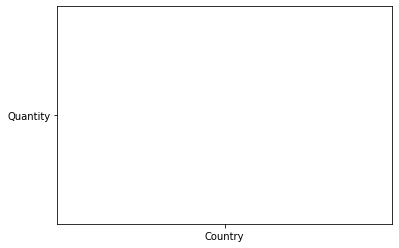

In [17]:
plt.bar('Country',height='Quantity')

# Change the data type as int for nan values

In [18]:
df['CustomerID'] = df['CustomerID'].fillna(0).astype(str)
df['CustomerID'] = df['CustomerID'].apply(str)

In [19]:
df['CustomerID'].head()

0    17850.0
1    17850.0
2    17850.0
3    17850.0
4    17850.0
Name: CustomerID, dtype: object

In [20]:
df['Product_Name'] = df['Product_Name'].apply(str)

In [21]:
df['InvioceDate'] = pd.to_datetime(df['InvoiceDate'])
# df['InvoiceDate'] =  pd.to_datetime(df['InvoiceDate'], format='%d%b%Y:%H:%M:%S.%f')

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     541909 non-null  object        
 1   StockCode     541909 non-null  object        
 2   Product_Name  541909 non-null  object        
 3   Quantity      541909 non-null  int64         
 4   InvoiceDate   541909 non-null  object        
 5   UnitPrice     541909 non-null  float64       
 6   CustomerID    541909 non-null  object        
 7   Country       541909 non-null  object        
 8   InvioceDate   541909 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 37.2+ MB


### total entries

In [ ]:
df.count()

### Total customers

In [ ]:
df['CustomerID'].nunique()

### without null values

In [ ]:
df_mis_drop = df.dropna()

## Total entries Now

In [ ]:
df_mis_drop.count()

### no of purchaces in each country

In [ ]:
df['Country'].value_counts()

## total no of countries


In [ ]:
df['Country'].nunique()


# Most frequently bought coustomers


In [ ]:
df['CustomerID'].value_counts().head(20)

# The missing analysis
## Missing Types
### Missing completely at random (MCAR)
### Missing at random (MAR)
### Not missing at random (NMAR)

## In which country has the coustomerID missing values

In [ ]:
df_cust_mis_coty=df.loc[df['CustomerID']== 0]
df_cust_mis_coty['Country'].value_counts()

## top products bought

In [ ]:
df['Description'].value_counts().head(10)

# The country has the most Product missing values

In [ ]:
df_disc=df.loc[df['Description'].isnull()]
df_disc['Country'].value_counts()

In [ ]:
df['Description'].value_counts()

In [ ]:
# select few columns with a condition
df.loc[(df.Quantity >= 12), ['Country', 'Product_Name']]

In [ ]:
min=df['Quantity'].nsmallest(10)

min

In [ ]:
df['Quantity'].describe()

In [ ]:
df['Total_amount'] = df['Quantity'] * df['UnitPrice']

In [ ]:
df['Total_amount']

In [ ]:
df.head(5)